In [16]:
from IPython.display import Image
# 啟動互動式繪圖環境
%pylab inline
import matplotlib.pyplot as plt
# http://networkx.github.io/documentation/networkx-1.9.1/tutorial/index.html
import networkx as nx
import numpy as np
import itertools
# http://perso.crans.org/aynaud/communities/
import community
from random import randint

Populating the interactive namespace from numpy and matplotlib


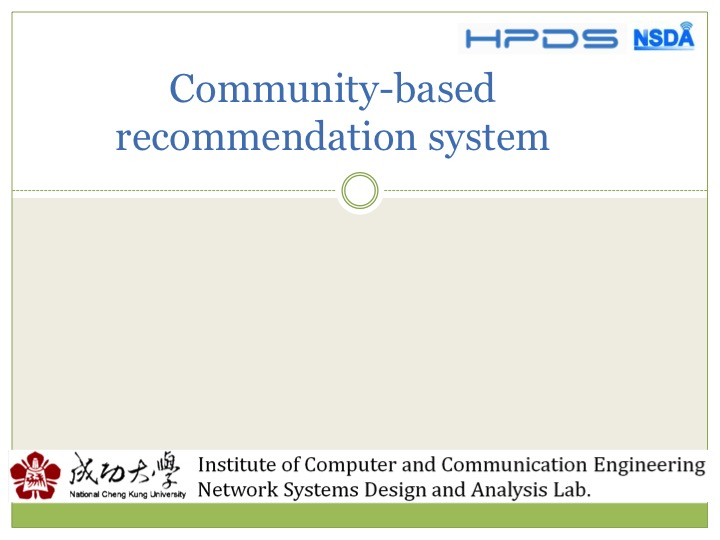

In [3]:
Image(filename='/Users/wy/Desktop/DMppt/data-mining-project/01.jpg')

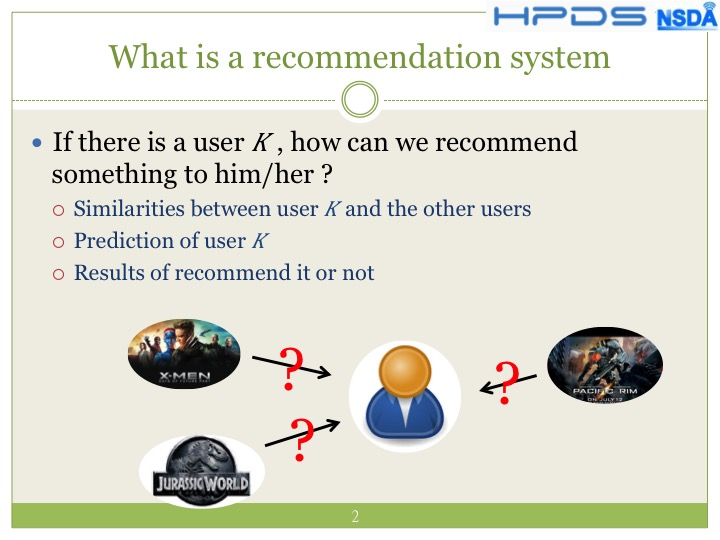

In [4]:
Image(filename='/Users/wy/Desktop/DMppt/data-mining-project/02.jpg')

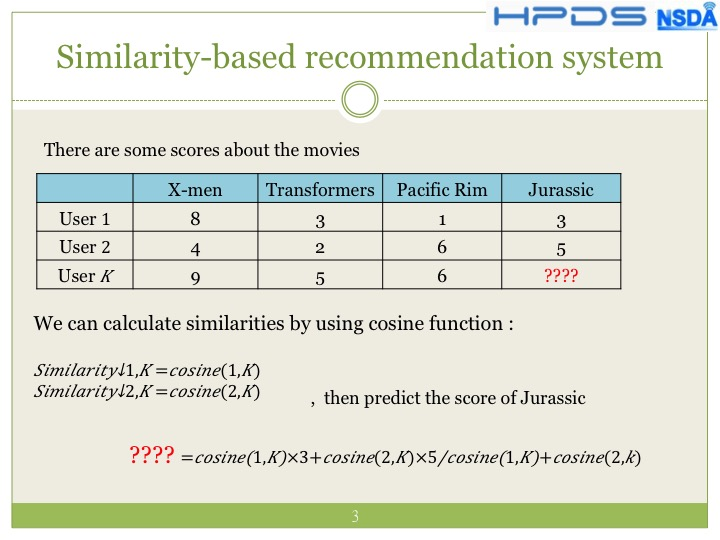

In [5]:
Image(filename='/Users/wy/Desktop/DMppt/data-mining-project/03.jpg')

In [32]:
# Cosine Similarity 
def cosSim(a,b):
    cos = float(np.inner(a,b))/(np.linalg.norm(a)*np.linalg.norm(b))
    norCos = 0.5+0.5*cos
    return norCos
user1 = [8,3,1]
user2 = [4,2,6]
userk = [9,5,6]
ans = (cosSim(user1,userk)*3+cosSim(user2,userk)*5)/(cosSim(user1,userk)+cosSim(user2,userk))
print(ans)

4.00321657273


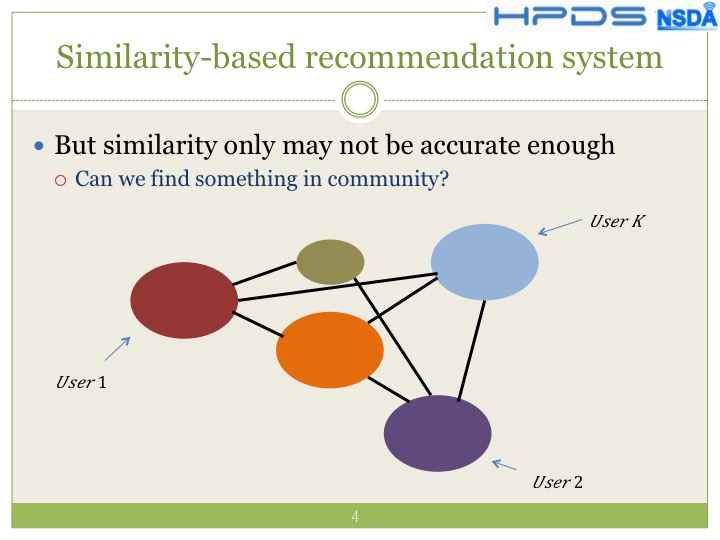

In [6]:
Image(filename='/Users/wy/Desktop/DMppt/data-mining-project/04.jpg')

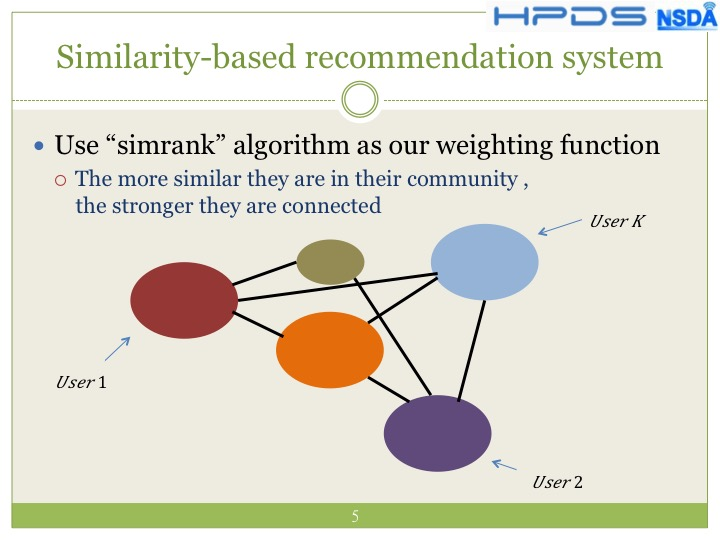

In [7]:
Image(filename='/Users/wy/Desktop/DMppt/data-mining-project/05.jpg')

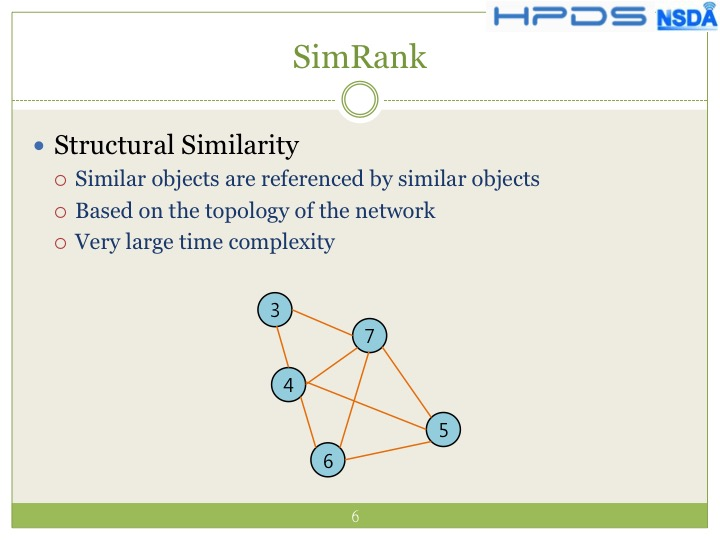

In [8]:
Image(filename='/Users/wy/Desktop/DMppt/data-mining-project/06.jpg')

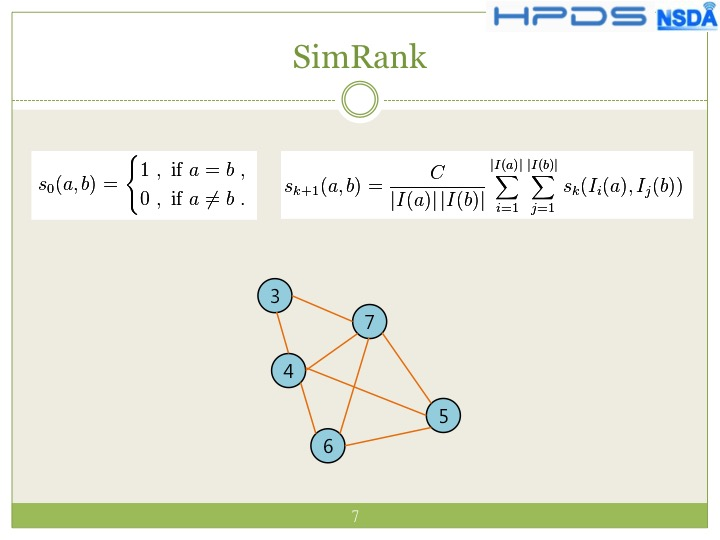

In [9]:
Image(filename='/Users/wy/Desktop/DMppt/data-mining-project/07.jpg')

In [28]:
G=nx.Graph()
G.add_nodes_from(['3','4','5','6','7'])
G.add_edges_from([('3','7'),('3','4'),('4','7'),('5','6'),('6','7'),('6','4'),('4','5'),('7','5')])
# simrank
def simrank(G, r=0.9, max_iter=100, eps=1e-4):
    nodes = G.nodes()
    nodes_i = {k: v for(k, v) in [(nodes[i], i) for i in range(0, len(nodes))]}
    sim_prev = np.zeros(len(nodes))
    sim = np.identity(len(nodes))
    for i in range(max_iter):
        if np.allclose(sim, sim_prev, atol=eps):
            break
        sim_prev = np.copy(sim)
        for u, v in itertools.product(nodes, nodes):
            if u is v:
                continue
            u_ns, v_ns = G.neighbors(u), G.neighbors(v)
            s_uv = sum([sim_prev[nodes_i[u_n]][nodes_i[v_n]] for u_n, v_n in itertools.product(u_ns, v_ns)])
            sim[nodes_i[u]][nodes_i[v]] = (r * s_uv) / (len(u_ns) * len(v_ns))
    return sim
simrank(G)

array([[ 1.        ,  0.67472892,  0.59467729,  0.59467729,  0.67472892],
       [ 0.67472892,  1.        ,  0.61598931,  0.61598931,  0.6366607 ],
       [ 0.59467729,  0.61598931,  1.        ,  0.63325538,  0.61598931],
       [ 0.59467729,  0.61598931,  0.63325538,  1.        ,  0.61598931],
       [ 0.67472892,  0.6366607 ,  0.61598931,  0.61598931,  1.        ]])

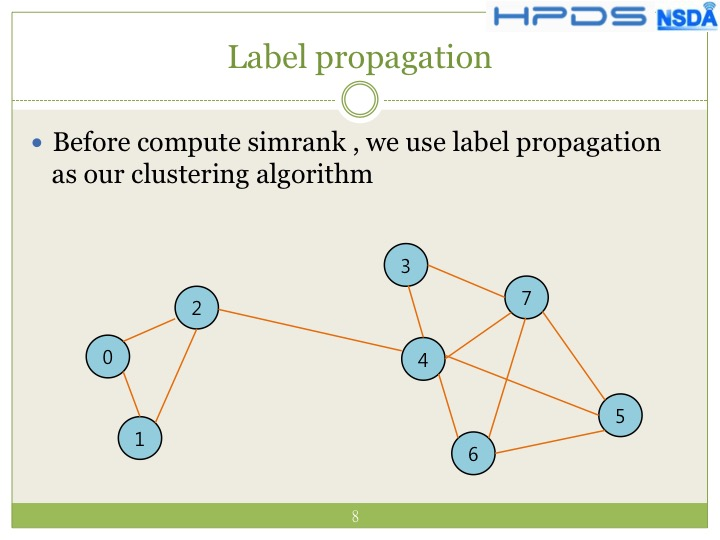

In [10]:
Image(filename='/Users/wy/Desktop/DMppt/data-mining-project/08.jpg')

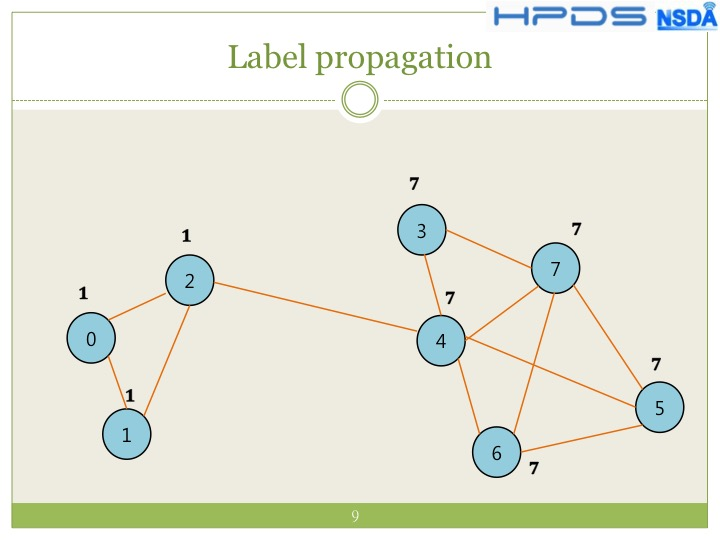

In [11]:
Image(filename='/Users/wy/Desktop/DMppt/data-mining-project/09.jpg')

In [29]:
G=nx.Graph()
G.add_nodes_from(['0','1','2','3','4','5','6','7'])
G.add_edges_from([('0','1'),('0','2'),('1','2'),('2','3'),('3','6'),('3','4'),('4','5'),('5','6'),('6','7'),('7','5'),('7','3')])

# Label Propagation community dection
def findMaxNum(List):
    a = {}
    for tmp in List:
        if a.has_key(tmp):
            a[tmp]+=1
        else:
            a[tmp]=1
    for key, value in a.iteritems():
        if value == sorted(a.values(),reverse=True)[0]:
            return key

# 初始化 label
for node in G.nodes():
    G.node[node]['id']= int(node)

# 分配最高的label
for time in range(20):
    for node in G.nodes():
        tmp = []
        for neighborNode in G.neighbors(node):
            tmp.append(G.node[neighborNode]['id'])
        label = findMaxNum(tmp)
        G.node[node]['id'] = label
        
for node in G.nodes():
    print(node+':'+str(G.node[node]['id']))

1:0
0:0
3:2
2:0
5:2
4:2
7:2
6:2



###
###community based recommendation system
####source1

|  | Movie1 | Movie2 |Movie3 | 
| ------------ | ------------- | ------------ |
| User1| 5 | 1 |5|
| User2| 1|4|3|
| Userk| 2|3|?|  
  
  

\\[ ? =\frac{cos(Userk,User1)\times5+\cos(Userk,User2)\times3} 
{cos(Userk,User1)\+\cos(Userk,User2)}\\]
###source2
![It doesn't matter what you write here](http://hpdswy.ee.ncku.edu.tw/~wy/image/graph1.png)
####Cluster1 : 0,1,2
####Cluster2 : 3,4,5,6,7

\\[ ? =\frac{(\alpha\*cos(Userk,User1)+\beta\*wc(Userk,User1))\times5...} 
{(\alpha\*cos(Userk,User1)+\beta\*wc(Userk,User1))...}\\]

###similiarty

####in same cluster:  

####wc : simrank(userX,user1)

####in different cluster:  

####wc : 0.1

### different parameter (alpha: cosine bete: simrank)
#### 1. alpha: 1 bete: 0
#### 2. alpha: 0 bete: 1
#### 3. alpha: 0.5 bete: 0.5

In [40]:
# load real dataSet 854K
# https://snap.stanford.edu/data/egonets-Facebook.html
edges=[]
nodes=[]
with open ('/Users/wy/Desktop/facebook_combined.txt','r') as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip()   
        line = line.split(' ')
        edges.append((line[0],line[1]))
        nodes.append(line[0])
        nodes.append(line[1])
nodes = set(nodes)
G=nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
print("nodes:"+str(len(G.nodes())))
print("edges:"+str(len(G.edges())))

# 分群
partition = community.best_partition(G)

clusters = {}
for key, value in partition.iteritems():
    if not clusters.has_key(value):
        clusters[value] = [key]
    else:
        clusters[value].append(key)
        
subClustersList = []   
for subKey in range(len(clusters.keys())):
    subCluster = G.subgraph(clusters[subKey])
    subClustersList.append(subCluster)

# 稍微看一下 cluster 分配的 user數
for key, value in clusters.iteritems():
    print(str(key)+':'+str(len(value)))

nodes:4039
edges:88234
0:548
1:60
2:514
3:60
4:206
5:341
6:310
7:391
8:423
9:237
10:549
11:73
12:19
13:226
14:38
15:25
16:19


#### run time：14:13:53.351178 (14hr)
#### rating item：users = nodes = 4039 , item = 1000 (1-5 score , 20% no rating 0 score)

#### recommend
#####recommend(fbDataSet2, 1, N=10 ,alpha=1,beta=0)  
* 310,568,610,694,501,732,528,139,290,644  

#####recommend(fbDataSet2, 1, N=10 ,alpha=0,beta=1)  
* 310,568,694,610,732,501,290,528,644,245  

#####recommend(fbDataSet2, 1, N=10 ,alpha=0.5,beta=0.5)  
* 310,568,610,694,501,732,528,290,139,644  

#####recommend(fbDataSet2, 1, N=10 ,alpha=1,beta=0)  
* 310,568,610,694,501,732,528,139,290,644  

#####recommend(fbDataSet2, 1, N=10 ,alpha=0,beta=1)  
* 310,568,694,610,732,501,290,528,644,245  

#####recommend(fbDataSet2, 1, N=10 ,alpha=0.5,beta=0.5)  
* 310,568,610,694,501,732,528,290,139,644  

### why is not very different?  

#### ans：rating high score-310,568 has many high rating score (TopPop)

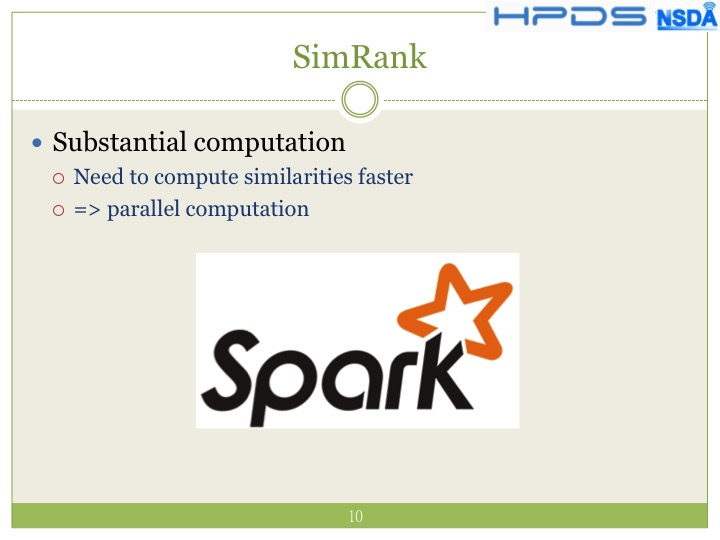

In [12]:
Image(filename='/Users/wy/Desktop/DMppt/data-mining-project/10.jpg')

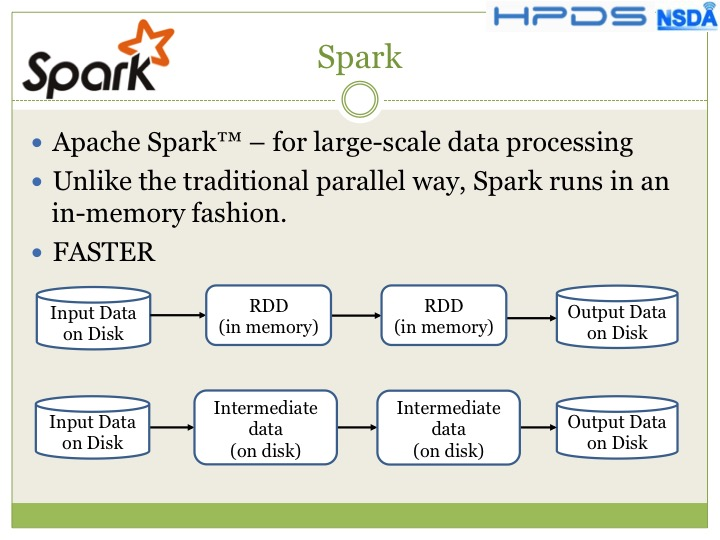

In [13]:
Image(filename='/Users/wy/Desktop/DMppt/data-mining-project/11.jpg')

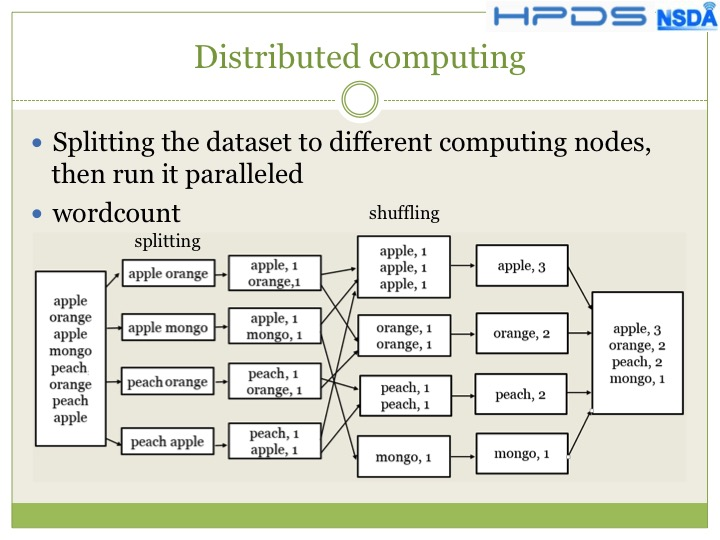

In [14]:
Image(filename='/Users/wy/Desktop/DMppt/data-mining-project/12.jpg')


[Github](https://github.com/wy36101299/DATA-MINING-SOCIAL-NETWORK-ANALYSIS-HW/tree/master/final-project
)  

[online ipynb](http://nbviewer.ipython.org/url/hpdswy.ee.ncku.edu.tw/~wy/git_project/DATA-MINING-SOCIAL-NETWORK-ANALYSIS-HW/final-project/community-based%20recommendation%20system.ipynb)

